In [1]:
# Importations
import pickle
import warnings

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

warnings.filterwarnings("ignore")

In [2]:
# Loading the btc data
df = pd.read_csv("btc_data.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,2020-07-01,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
1,2020-07-02,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2,2020-07-03,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
3,2020-07-04,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
4,2020-07-05,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [3]:
# Setting the index to date
df.set_index("Date", inplace=True)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-01,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
2020-07-02,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2020-07-03,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
2020-07-04,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
2020-07-05,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [4]:
# Want to check the index type
df.index

Index(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04', '2020-07-05',
       '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10',
       ...
       '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-05', '2025-07-06',
       '2025-07-07', '2025-07-08', '2025-07-09', '2025-07-10', '2025-07-11'],
      dtype='object', name='Date', length=1837)

In [5]:
# Setting the index type from 'object' to 'datetime'
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-04',
               '2020-07-05', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2025-07-02', '2025-07-03', '2025-07-04', '2025-07-05',
               '2025-07-06', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1837, freq=None)

In [6]:
# Localising the index
df.index = df.index.tz_localize("UTC").tz_convert("America/Los_Angeles")
df.index

DatetimeIndex(['2020-06-30 17:00:00-07:00', '2020-07-01 17:00:00-07:00',
               '2020-07-02 17:00:00-07:00', '2020-07-03 17:00:00-07:00',
               '2020-07-04 17:00:00-07:00', '2020-07-05 17:00:00-07:00',
               '2020-07-06 17:00:00-07:00', '2020-07-07 17:00:00-07:00',
               '2020-07-08 17:00:00-07:00', '2020-07-09 17:00:00-07:00',
               ...
               '2025-07-01 17:00:00-07:00', '2025-07-02 17:00:00-07:00',
               '2025-07-03 17:00:00-07:00', '2025-07-04 17:00:00-07:00',
               '2025-07-05 17:00:00-07:00', '2025-07-06 17:00:00-07:00',
               '2025-07-07 17:00:00-07:00', '2025-07-08 17:00:00-07:00',
               '2025-07-09 17:00:00-07:00', '2025-07-10 17:00:00-07:00'],
              dtype='datetime64[ns, America/Los_Angeles]', name='Date', length=1837, freq=None)

In [7]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-30 17:00:00-07:00,9228.325195,9309.754883,9104.735352,9145.985352,15971550355
2020-07-01 17:00:00-07:00,9123.410156,9274.962891,9036.623047,9231.139648,16338916796
2020-07-02 17:00:00-07:00,9087.303711,9202.344727,9058.794922,9124.842773,13078970999
2020-07-03 17:00:00-07:00,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
2020-07-04 17:00:00-07:00,9073.942383,9162.183594,8977.015625,9126.090820,12903406143


In [8]:
# Dropping the columns we wont be using
df.drop(columns=["High", "Low", "Open", "Volume"], inplace=True)
df.head()

,Close
Date,
2020-06-30 17:00:00-07:00,9228.325195
2020-07-01 17:00:00-07:00,9123.410156
2020-07-02 17:00:00-07:00,9087.303711
2020-07-03 17:00:00-07:00,9132.488281
2020-07-04 17:00:00-07:00,9073.942383


In [9]:
df.shape

(1837, 1)

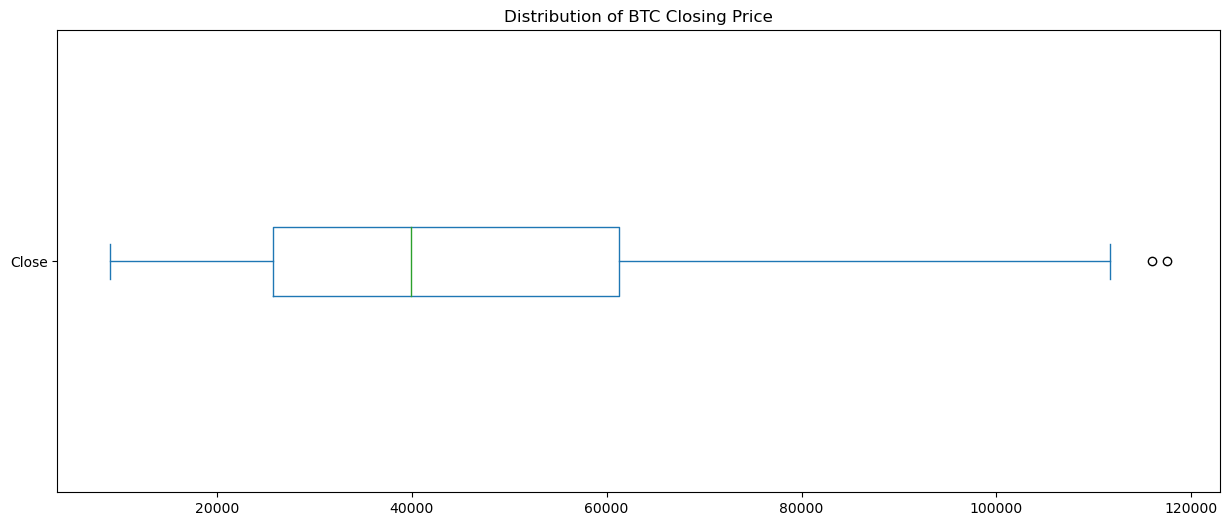

In [10]:
# Visualizing the distribution of closing price
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(
    kind="box",
    vert=False,
    title="Distribution of BTC Closing Price",
    ax=ax);

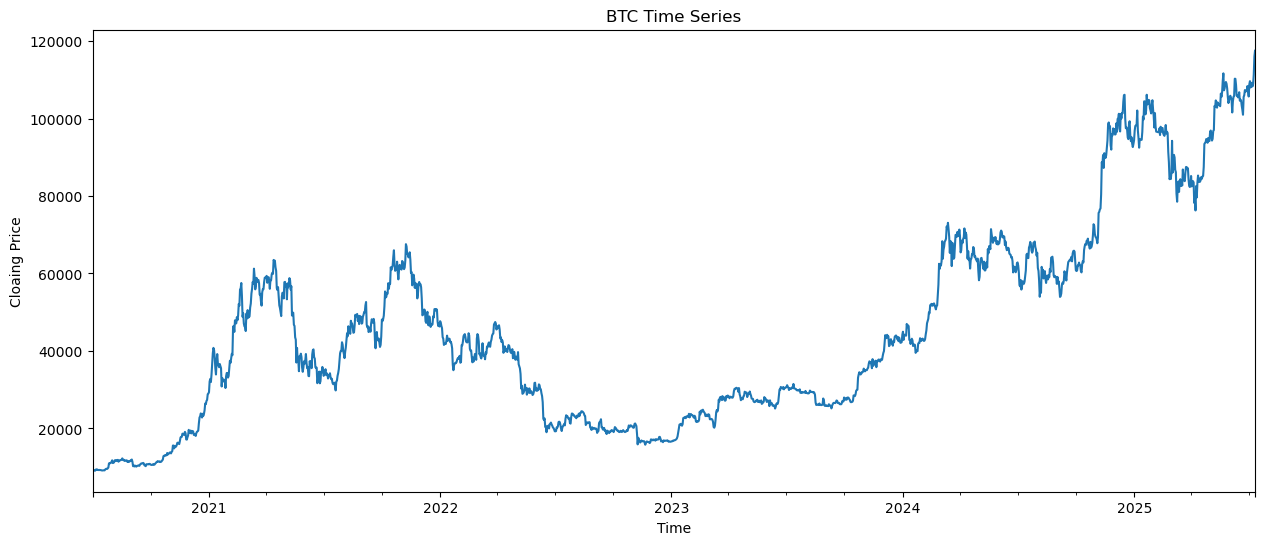

In [11]:
# Visualizing the time series trend of closing price
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(xlabel="Time", ylabel="Cloaing Price", title="BTC Time Series", ax=ax);

In [12]:
# Performing rolling average to get a better view of the data
df["Close"].rolling(30, min_periods=1).mean().tail()

Date
2025-07-06 17:00:00-07:00    106649.347396
2025-07-07 17:00:00-07:00    106754.568229
2025-07-08 17:00:00-07:00    106788.983333
2025-07-09 17:00:00-07:00    106979.982292
2025-07-10 17:00:00-07:00    107274.327865
Name: Close, dtype: float64

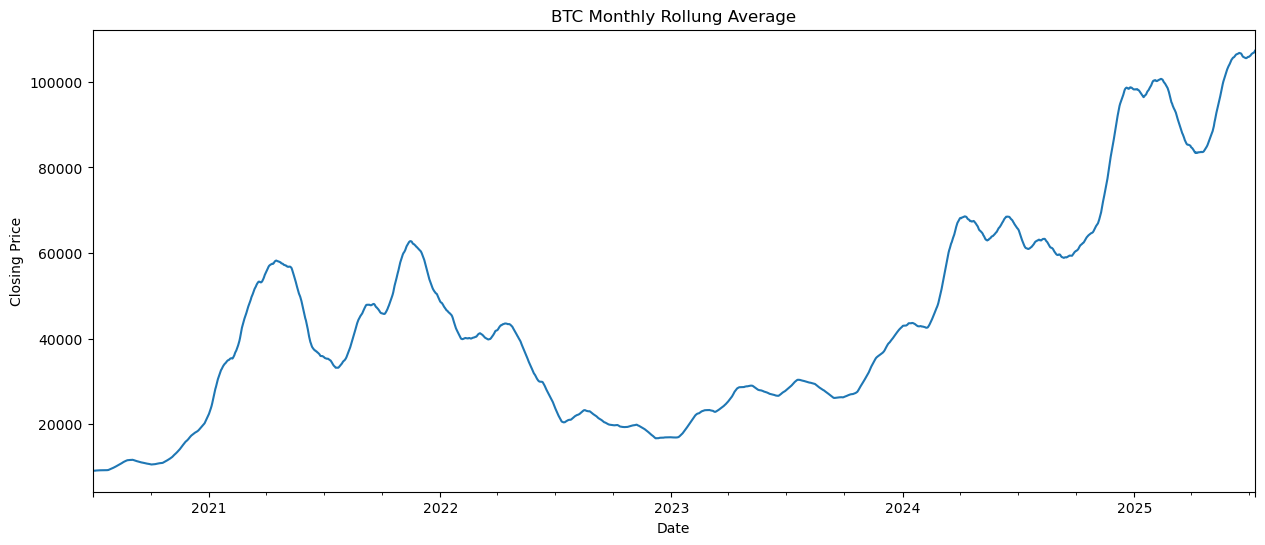

In [13]:
# Plotting the rolling average
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].rolling(30, min_periods=1).mean().plot(ax=ax, ylabel="Closing Price", title="BTC Monthly Rollung Average");

In [14]:
# Creating a target column using shift()
df["Close_1"] = df["Close"].shift(1)
df.dropna(inplace=True)
df.head()

,Close,Close_1
Date,,
2020-07-01 17:00:00-07:00,9123.410156,9228.325195
2020-07-02 17:00:00-07:00,9087.303711,9123.410156
2020-07-03 17:00:00-07:00,9132.488281,9087.303711
2020-07-04 17:00:00-07:00,9073.942383,9132.488281
2020-07-05 17:00:00-07:00,9375.474609,9073.942383


In [15]:
# Checking correlation
df["Close"].corr(df["Close_1"])
df["Close"].corr(df["Close_1"])

0.9983327719359123

In [16]:
# Checking total correlations
df.corr()

,Close,Close_1
Close,1.000000,0.998333
Close_1,0.998333,1.000000


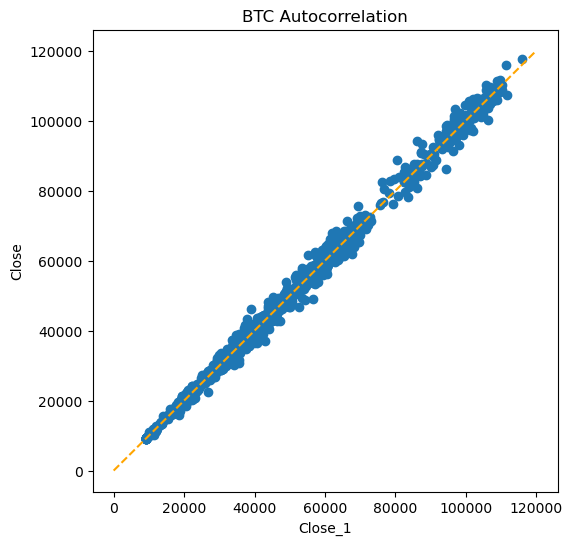

In [17]:
# Plotting the whole correlation
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x=df["Close_1"], y=df["Close"])
ax.plot([0, 120000], [0, 120000], linestyle="--", color="orange")
plt.xlabel("Close_1")
plt.ylabel("Close")
plt.title("BTC Autocorrelation");

In [18]:
# Creating our feature matrix (X) and target vector (y) (Vertical split)
target = "Close_1"
y = df[target]
X = df.drop(columns=target)

In [19]:
X.head()

,Close
Date,
2020-07-01 17:00:00-07:00,9123.410156
2020-07-02 17:00:00-07:00,9087.303711
2020-07-03 17:00:00-07:00,9132.488281
2020-07-04 17:00:00-07:00,9073.942383
2020-07-05 17:00:00-07:00,9375.474609


In [20]:
# Creating out horizontal split (80% for training, 20% for testing)
cutoff = int(len(X) * 0.8)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [21]:
# Checking split accuracy
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [22]:
# Checking mean absolute error baseline
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean Close Reading:", round(y_mean, 2))
print("MAE Baseline:", round(mae_baseline, 2))

Mean Close Reading: 35376.87
MAE Baseline: 13763.42


In [23]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Train and test MAE
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print("Training MAE:", training_mae)
print("Test MAE:", test_mae)

Training MAE: 825.8892174336655
Test MAE: 1516.7719858053592


In [25]:
# Getting model stats, 'y = b + mx'
intercept = model.intercept_
coefficient = model.coef_
model_acc = model.score(X_train, y_train)

print(f"Close = {intercept} + ({coefficient} * Close_1)")
print(f"Model Accuracy:", model_acc)

Close = 68.93861181251123 + ([0.99713973] * Close_1)
Model Accuracy: 0.9937043993532116


In [26]:
# Creating test and prediction dataframe
df_pred_test = pd.DataFrame({
    "y_test": y_test,
    "y_predict": model.predict(X_test)
})

df_pred_test.head()

,y_test,y_predict
Date,,
2024-07-08 17:00:00-07:00,56705.097656,57912.243404
2024-07-09 17:00:00-07:00,58009.226562,57646.275855
2024-07-10 17:00:00-07:00,57742.496094,57249.831014
2024-07-11 17:00:00-07:00,57344.914062,57802.795633
2024-07-12 17:00:00-07:00,57899.464844,59131.472644


In [27]:
df_pred_test.tail()

,y_test,y_predict
Date,,
2025-07-06 17:00:00-07:00,109232.070312,108059.023881
2025-07-07 17:00:00-07:00,108299.851562,108707.585377
2025-07-08 17:00:00-07:00,108950.273438,111077.069832
2025-07-09 17:00:00-07:00,111326.554688,115724.387579
2025-07-10 17:00:00-07:00,115987.203125,117249.801040


In [28]:
# Plotting the test and prediction dataframe
fig = px.line(df_pred_test, labels={"value": "Close"})
fig.show();

In [29]:
# Predicting the the closing price for today, 12th July, 2025 
# using the closing price of yesterday, 117516.99

todays_close = model.predict([[117516.99]])
print("Today's close:", todays_close)

Today's close: [117249.79885828]


In [30]:
# Saving the model
with open("linear_btc_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [31]:
# Loading the model
with open("linear_btc_model.pkl", "rb") as f:
    lr_model = pickle.load(f)

In [33]:
# testing the loaded model
todays_close = model.predict([[117516.99]])
random_close = lr_model.predict([[117372.60]])

print("Today's close:", todays_close)
print("Random close:", random_close)

Today's close: [117249.79885828]
Random close: [117105.82185197]
